
#### Roll No.: 19BCE041
#### Course : Machine Learning
#### Course Code : 2CS501
#### Practical : 7
#### Dataset : Iris

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

In [1]:
import numpy as np
import pandas as pd
#importing libraries

In [2]:
import operator
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [4]:
from sklearn import metrics,tree,datasets,svm
from sklearn.metrics import classification_report,confusion_matrix


In [5]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data['DESCR'])
#loading dataset 
#printing description of dataset using DESCRIBE

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X,y = load_iris(return_X_y=True)
#loading in X  n  Y

In [7]:
x_train= X[range(0,150,2),:]
x_test=X[range(1,150,2),:]
y_train=y[range(0,150,2)]
y_test=y[range(1,150,2)]

#SPLITTING OUT DATASET in training and testing

In [8]:
#first of we'll prepare SVC model 
from sklearn.svm import SVC # "Support vector classifier"  
model = SVC(kernel='linear', random_state=0)  


In [9]:
model.fit(x_train,y_train)
#model fitting

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
pred=model.predict(x_test)
#prediction

In [11]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2]


In [12]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [13]:
print(pred-y_test)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0]


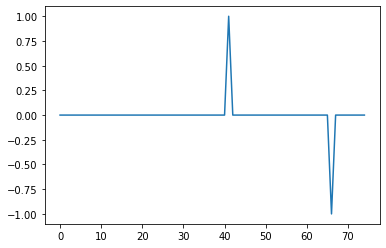

In [14]:
import matplotlib.pyplot as plt
plt.plot(pred-y_test)
#spikes displayes error

In [15]:
print('The Model Has Achieved %.2f Percent Accuracy'%(100*metrics.accuracy_score(y_test,pred)))
#97.33 % accurancy

The Model Has Achieved 97.33 Percent Accuracy


In [16]:
print(metrics.confusion_matrix(y_test,pred))

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


In [17]:
print(metrics.classification_report(y_test,pred,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



In [18]:

#now we will prepare LINEARSVC model
from sklearn.svm import SVC ,LinearSVC  
model = LinearSVC()  


In [19]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [20]:
pred=model.predict(x_test)

In [21]:
print('The Model Has Achieved %.2f Percent Accuracy'%(100*metrics.accuracy_score(y_test,pred)))

The Model Has Achieved 96.00 Percent Accuracy


In [ ]:
## Grid Search for Hyper-parameter tuning using sklearn

In [24]:
#importing GridSearchCV here
from sklearn.model_selection import GridSearchCV

In [25]:
#defining set of parameters for C,Gamma value, and Kernel
#C=Regularization parameter.
#Kernel type 
#gamma Kernel coefficient
params = {'C' : [0.1,1,10,50,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001,0.00001],
          'kernel' : ['rbf','linear']
             }

In [26]:
#creating our model using GridSearchCV For model with best_params values of c,gamma , kernel catagory
model = GridSearchCV(svm.SVC(),params)

# fitting model on training set
model.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
#Predict the result on Testing set
prediction = model.predict(x_test)


In [32]:
#print(100*(metrics.accuracy_score(y_test,prediction)))
print('The Model Has Achieved %.2f Percent Accuracy'%(100*metrics.accuracy_score(y_test,prediction)))
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
# Display the Accuracy,statistics and Confusion matrics for this model

98.66666666666667
The Model Has Achieved 98.67 Percent Accuracy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [34]:
print("Best Parameters of model\n\n",model.best_params_)

Best Parameters of model

 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
